Scrapping web
============================================================================================================================================================
============================================================================================================================================================
============================================================================================================================================================

pre isntall di terminal (menggunakan cmd bukan powershell)

"pip install nltk Sastrawi beautifulsoup4 scikit-learn matplotlib wordcloud numpy pandas requests ipykernel

In [1]:
# 1
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:

# 2
# diisi link artikel dr harian jogja
urls = [
    "https://pendidikan.harianjogja.com/read/2025/11/15/642/1235745/telkom-dan-ugm-jalin-kerja-sama-pengembangan-ai",
    "https://pendidikan.harianjogja.com/read/2025/11/15/642/1235729/man-ic-pekalongan-raih-3-medali-emas-bidang-ekonomi-di-pmi-2025",
    "https://pendidikan.harianjogja.com/read/2025/11/15/642/1235706/smpn-2-kalasan-tegaskan-pembinaan-karakter-siswa-baru",
    "https://pendidikan.harianjogja.com/read/2025/11/11/642/1235235/mendikdasmen-dukung-rencana-istana-batasi-akses-gim-online",
    "https://pendidikan.harianjogja.com/read/2025/11/14/642/1235604/ukdw-gelar-cocosda-2025-bahas-teknologi-ujaran-dan-ai",
    "https://pendidikan.harianjogja.com/read/2025/11/11/642/1235137/unisa-jogja-perkuat-pencegahan-kekerasan-lewat-satgas-khusus"
]

results = []

In [3]:
# buat scraping web
for url in urls:
    print("Scraping:", url)
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

    # scrap judul
    title_container = soup.find("div", class_="c-read-title")
    if title_container:
        h1_tag = title_container.find("h1")
        title = h1_tag.get_text(strip=True) if h1_tag else "Tidak ada judul"
    else:
        title = "Tidak ada judul"

    # scrp Tanggal
    date_element = soup.find("div", class_="c-read-credit-date")
    date = date_element.get_text(strip=True) if date_element else "Tidak ada tanggal"

    # scrap berita
    body_element = soup.find("div", class_="c-read-body")
    if body_element:
        paragraphs = body_element.find_all(["p", "span"])
        content = " ".join([p.get_text(strip=True) for p in paragraphs])
    else:
        content = "Tidak ada konten"

    results.append({
        "url": url,
        "title": title,
        "date": date,
        "content": content
    })

Scraping: https://pendidikan.harianjogja.com/read/2025/11/15/642/1235745/telkom-dan-ugm-jalin-kerja-sama-pengembangan-ai
Scraping: https://pendidikan.harianjogja.com/read/2025/11/15/642/1235729/man-ic-pekalongan-raih-3-medali-emas-bidang-ekonomi-di-pmi-2025
Scraping: https://pendidikan.harianjogja.com/read/2025/11/15/642/1235706/smpn-2-kalasan-tegaskan-pembinaan-karakter-siswa-baru
Scraping: https://pendidikan.harianjogja.com/read/2025/11/11/642/1235235/mendikdasmen-dukung-rencana-istana-batasi-akses-gim-online
Scraping: https://pendidikan.harianjogja.com/read/2025/11/14/642/1235604/ukdw-gelar-cocosda-2025-bahas-teknologi-ujaran-dan-ai
Scraping: https://pendidikan.harianjogja.com/read/2025/11/11/642/1235137/unisa-jogja-perkuat-pencegahan-kekerasan-lewat-satgas-khusus


In [1]:
# pembghapus results
# jangan di run!! buat reset hasil soalnya

results = []

In [4]:
# cek result
# cuma buat croscek, nga ngaruh ke sistem

results

[{'url': 'https://pendidikan.harianjogja.com/read/2025/11/15/642/1235745/telkom-dan-ugm-jalin-kerja-sama-pengembangan-ai',
  'title': 'Telkom dan UGM Jalin Kerja Sama Pengembangan AI',
  'date': 'Sabtu, 15 November 2025 - 19:47 WIB',
  'content': 'SLEMAN—PT Telkom Indonesia (Persero) Tbk. menandatangani nota kesepahaman (MoU) dengan Universitas Gadjah Mada (UGM) untuk pengembangan Telkom Artificial Intelligence (AI) Center of Excellence di Gelanggang Inovasi dan Kreativitas (GIK) UGM, Sabtu (15/11/2025). Kolaborasi antara BUMN telekomunikasi dengan perguruan tinggi tersebut diharapkan melahirkan inovasi baru yang memiliki manfaat luas di berbagai sektor. SLEMAN— PT Telkom Indonesia (Persero) Tbk. menandatangani nota kesepahaman (MoU) dengan Universitas Gadjah Mada (UGM) untuk pengembangan Telkom Artificial Intelligence (AI) Center of Excellence di Gelanggang Inovasi dan Kreativitas (GIK) UGM, Sabtu (15/11/2025). Kolaborasi antara BUMN telekomunikasi dengan perguruan tinggi tersebut dih

In [5]:
# Simpan hasil ke file TXT
# cuma buat salinan file backup, nga ngaruh ke sistem
    
with open("hasil_scraping.txt", "w", encoding="utf-8") as file:
    for item in results:
        file.write("URL: " + item["url"] + "\n")
        file.write("Judul: " + item["title"] + "\n")
        file.write("Tanggal: " + item["date"] + "\n")
        file.write("Isi Berita:\n" + item["content"] + "\n")
        file.write("="*80 + "\n\n")

print("Data berhasil disimpan ke hasil_scraping.txt")


Data berhasil disimpan ke hasil_scraping.txt


In [6]:
# menampilkan data dalam dataframe
df = pd.DataFrame(results)
df

,url,title,date,content
0,https://pendidikan.harianjogja.com/read/2025/1...,Telkom dan UGM Jalin Kerja Sama Pengembangan AI,"Sabtu, 15 November 2025 - 19:47 WIB",SLEMAN—PT Telkom Indonesia (Persero) Tbk. mena...
1,https://pendidikan.harianjogja.com/read/2025/1...,MAN IC Pekalongan Raih 3 Medali Emas Bidang Ek...,"Sabtu, 15 November 2025 - 12:52 WIB","Harianjogja.com, PEKALONGAN—MAN Insan Cendekia..."
2,https://pendidikan.harianjogja.com/read/2025/1...,SMPN 2 Kalasan Tegaskan Pembinaan Karakter Sis...,"Sabtu, 15 November 2025 - 03:57 WIB","Harianjogja.com, SLEMAN—SMP Negeri 2 Kalasan m..."
3,https://pendidikan.harianjogja.com/read/2025/1...,Mendikdasmen Dukung Rencana Istana Batasi Akse...,"Selasa, 11 November 2025 - 13:37 WIB","Harianjogja.com, JAKARTA—Mendikdasmen Abdul Mu..."
4,https://pendidikan.harianjogja.com/read/2025/1...,"UKDW Gelar COCOSDA 2025, Bahas Teknologi Ujara...","Jum'at, 14 November 2025 - 11:57 WIB",JOGJA—Universitas Kristen Duta Wacana (UKDW) Y...
5,https://pendidikan.harianjogja.com/read/2025/1...,Unisa Jogja Perkuat Pencegahan Kekerasan Lewat...,"Selasa, 11 November 2025 - 15:27 WIB","Harianjogja.com, SLEMAN–Pembentukan Satuan Tug..."


preprocesing

============================================================================================================================================================
============================================================================================================================================================
============================================================================================================================================================

In [7]:
# import-import dulu nga sih

import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
# di run kalau kode dibawahnya error, kalo lancar biarin aja soale iki ngo direktori laptop ku (hendri)

import nltk

# Pastikan path NLTK terbaca
nltk.data.path.append(r"C:\Users\ASUS\AppData\Roaming\nltk_data")

# Jika belum di-download, baris ini aman tidak akan error
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)


True

In [9]:
# sm aja kaya kode diatas
import nltk
nltk.data.path.append(r"C:\Users\ASUS\AppData\Roaming\nltk_data")

print("Path NLTK:", nltk.data.path)

# Test apakah berhasil menemukan file punkt
nltk.data.find("tokenizers/punkt")

Path NLTK: ['C:\\Users\\ASUS/nltk_data', 'd:\\A disk D\\kuliah\\s5\\NLP\\teamBased\\tb\\nltk_data', 'd:\\A disk D\\kuliah\\s5\\NLP\\teamBased\\tb\\share\\nltk_data', 'd:\\A disk D\\kuliah\\s5\\NLP\\teamBased\\tb\\lib\\nltk_data', 'C:\\Users\\ASUS\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data', 'C:\\Users\\ASUS\\AppData\\Roaming\\nltk_data', 'C:\\Users\\ASUS\\AppData\\Roaming\\nltk_data']


FileSystemPathPointer('C:\\Users\\ASUS\\AppData\\Roaming\\nltk_data\\tokenizers\\punkt')

In [10]:
# ngetes, pasti error soale ngo direktori laptop ku (hendri)

from nltk.tokenize.punkt import PunktSentenceTokenizer

import pickle

with open(r"C:\Users\ASUS\AppData\Roaming\nltk_data\tokenizers\punkt\english.pickle", "rb") as f:
    tokenizer = pickle.load(f)

tokens = tokenizer.tokenize("Ini adalah teks percobaan.")
print(tokens)


['Ini adalah teks percobaan.']


In [11]:
# import terus
# jd satu sm bawahnya gpp

import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [12]:
# jd satu sm atas bawahnya gpp

stop_words = set(stopwords.words('indonesian'))

In [13]:
# jd satu sm atas gpp

factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [14]:
# tahap preprocesing
def preprocess_text(text):

    # --- 1. Case Folding ---
    text = text.lower()
    
    # --- 2. Cleaning (hapus angka, tanda baca, URL, dll.) ---
    text = re.sub(r'http\S+|www\S+', '', text)            # hapus URL
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)              # hapus simbol, angka
    text = re.sub(r'\s+', ' ', text).strip()              # rapikan spasi

    # --- 3. Tokenizing ---
    tokens = text.split()

    # --- 4. Stopwords Removal ---
    tokens = [word for word in tokens if word not in stop_words]

    # --- 5. Stemming ---
    tokens = [stemmer.stem(word) for word in tokens]

    return tokens

In [15]:
# tahap preprocesing 2

preprocessed_results = []

for item in results:
    cleaned_tokens = preprocess_text(item["content"])
    
    preprocessed_results.append({
        "url": item["url"],
        "title": item["title"],
        "date": item["date"],
        "tokens": cleaned_tokens
    })

In [16]:
# nampilin hasil
preprocessed_results

[{'url': 'https://pendidikan.harianjogja.com/read/2025/11/15/642/1235745/telkom-dan-ugm-jalin-kerja-sama-pengembangan-ai',
  'title': 'Telkom dan UGM Jalin Kerja Sama Pengembangan AI',
  'date': 'Sabtu, 15 November 2025 - 19:47 WIB',
  'tokens': ['sleman',
   'pt',
   'telkom',
   'indonesia',
   'persero',
   'tbk',
   'menandatangani',
   'nota',
   'paham',
   'mou',
   'universitas',
   'gadjah',
   'mada',
   'ugm',
   'kembang',
   'telkom',
   'artificial',
   'intelligence',
   'ai',
   'center',
   'of',
   'excellence',
   'gelanggang',
   'inovasi',
   'kreativitas',
   'gik',
   'ugm',
   'sabtu',
   'kolaborasi',
   'bumn',
   'telekomunikasi',
   'guru',
   'harap',
   'lahir',
   'inovasi',
   'milik',
   'manfaat',
   'luas',
   'sektor',
   'sleman',
   'pt',
   'telkom',
   'indonesia',
   'persero',
   'tbk',
   'menandatangani',
   'nota',
   'paham',
   'mou',
   'universitas',
   'gadjah',
   'mada',
   'ugm',
   'kembang',
   'telkom',
   'artificial',
   'intell

tf idf
====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

jujur aku iseh mumet bagian iki

In [17]:
# Ubah token menjadi satu string per dokumen
documents = [" ".join(item["tokens"]) for item in preprocessed_results]
documents[:2]   # contoh 2 dokumen pertama

['sleman pt telkom indonesia persero tbk menandatangani nota paham mou universitas gadjah mada ugm kembang telkom artificial intelligence ai center of excellence gelanggang inovasi kreativitas gik ugm sabtu kolaborasi bumn telekomunikasi guru harap lahir inovasi milik manfaat luas sektor sleman pt telkom indonesia persero tbk menandatangani nota paham mou universitas gadjah mada ugm kembang telkom artificial intelligence ai center of excellence gelanggang inovasi kreativitas gik ugm sabtu kolaborasi bumn telekomunikasi guru harap lahir inovasi milik manfaat luas sektor direktur it digital pt telkom indonesia faizal rochmad djoemadi telkom kembang inovasi digital dekade telkom investasi rp triliun dukung kembang ekosistem digital nasional direktur it digital pt telkom indonesia faizal rochmad djoemadi telkom kembang inovasi digital dekade telkom investasi rp triliun dukung kembang ekosistem digital nasional advertisement faizal industri proyek inovasi digital mandiri riset dasar butuh b

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Membuat vectorizer
vectorizer = TfidfVectorizer()

# Melakukan TF-IDF
tfidf_matrix = vectorizer.fit_transform(documents)

# Mengambil daftar semua kata unik
feature_names = vectorizer.get_feature_names_out()

In [19]:
import numpy as np

# Jumlahkan TF-IDF dari semua dokumen
tfidf_sum = tfidf_matrix.sum(axis=0)

# Ubah ke array
tfidf_sum = np.asarray(tfidf_sum).flatten()

# Urutkan dari terbesar
top_indices = tfidf_sum.argsort()[::-1][:20]

top_words = [(feature_names[i], tfidf_sum[i]) for i in top_indices]

top_words


[('satgas', np.float64(0.508375598521545)),
 ('menteri', np.float64(0.43179871110770146)),
 ('gim', np.float64(0.4210038539704923)),
 ('ai', np.float64(0.40851569671398136)),
 ('cocosda', np.float64(0.38865516450318394)),
 ('inovasi', np.float64(0.38664042778518876)),
 ('digital', np.float64(0.3755716770165808)),
 ('indonesia', np.float64(0.34981057016039707)),
 ('siswa', np.float64(0.34320800824454967)),
 ('keras', np.float64(0.3410029755084122)),
 ('amelia', np.float64(0.33451703037618036)),
 ('emas', np.float64(0.33451703037618036)),
 ('lapor', np.float64(0.3222952821265996)),
 ('ekonomi', np.float64(0.32182243053328285)),
 ('anak', np.float64(0.3184308150677102)),
 ('daring', np.float64(0.3157528904778692)),
 ('konferensi', np.float64(0.3076340439132039)),
 ('riset', np.float64(0.2929148372306606)),
 ('wantonoro', np.float64(0.29050034201231145)),
 ('medali', np.float64(0.28672888317958317))]

visualisasi
====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)

# Ambil nama fitur (kata)
feature_names = vectorizer.get_feature_names_out()

In [21]:

# Jumlahkan nilai tfidf untuk setiap kata di seluruh dokumen
tfidf_scores = tfidf_matrix.sum(axis=0).A1

# Buat DataFrame
df_tfidf = pd.DataFrame({
    "word": feature_names,
    "score": tfidf_scores
})

# Urutkan berdasarkan skor tertinggi
df_top20 = df_tfidf.sort_values(by="score", ascending=False).head(20)
df_top20

,word,score
477,satgas,0.508376
339,menteri,0.431799
164,gim,0.421004
9,ai,0.408516
102,cocosda,0.388655
205,inovasi,0.386640
127,digital,0.375572
200,indonesia,0.349811
501,siswa,0.343208
253,keras,0.341003


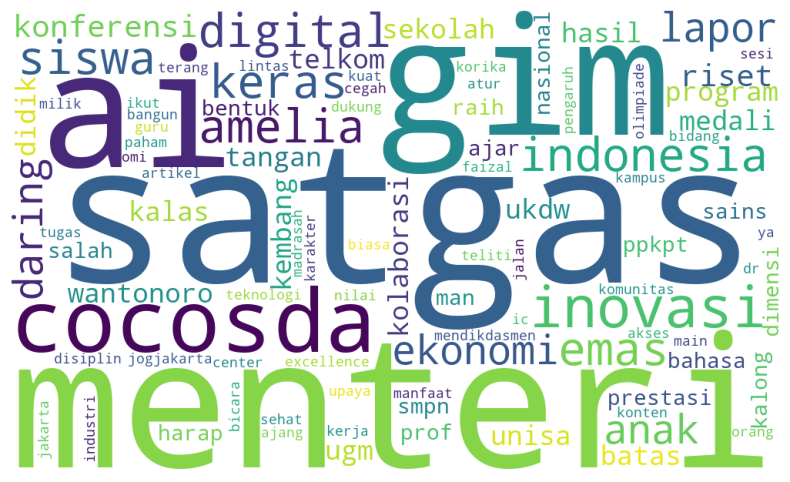

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(df_tfidf.sort_values(by="score", ascending=False).head(100)["word"])

wc = WordCloud(width=1000, height=600, background_color="white").generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wc)
plt.axis("off")
plt.show()


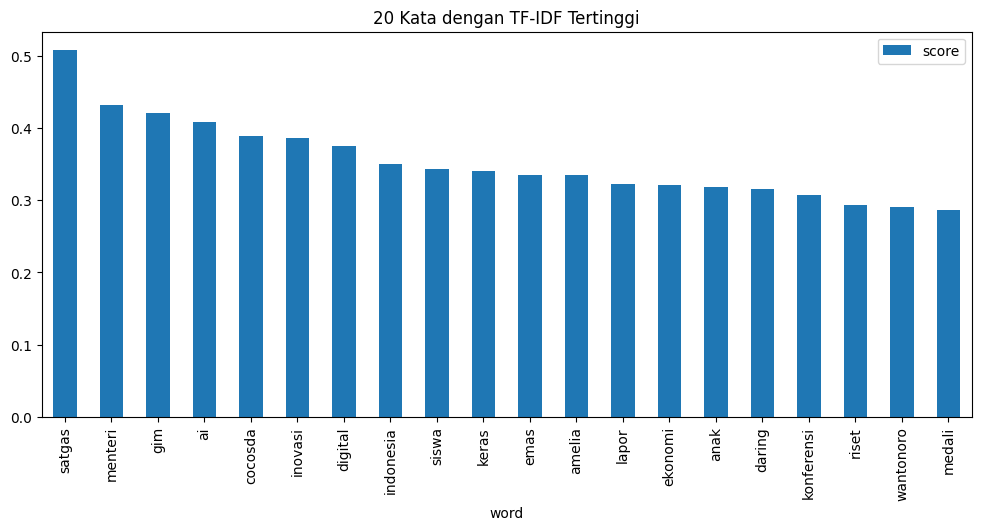

In [24]:
df_top20.plot(kind='bar', x='word', y='score', figsize=(12,5))
plt.title("20 Kata dengan TF-IDF Tertinggi")
plt.show()

wes mumet rasah digagas kode ngisor iki
======================================================================================================================

In [36]:
# pastikan preprocessed_results berisi list of dictionaries
df_full = pd.DataFrame(preprocessed_results)

# gabungkan tokens menjadi satu string per artikel
df_full["clean_text"] = df_full["tokens"].apply(lambda t: " ".join(t))

df_full.head()


,url,title,date,tokens,clean_text
0,https://pendidikan.harianjogja.com/read/2025/1...,Telkom dan UGM Jalin Kerja Sama Pengembangan AI,"Sabtu, 15 November 2025 - 19:47 WIB","[sleman, pt, telkom, indonesia, persero, tbk, ...",sleman pt telkom indonesia persero tbk menanda...
1,https://pendidikan.harianjogja.com/read/2025/1...,MAN IC Pekalongan Raih 3 Medali Emas Bidang Ek...,"Sabtu, 15 November 2025 - 12:52 WIB","[harianjogja, com, kalong, man, insan, cendeki...",harianjogja com kalong man insan cendekia ic k...
2,https://pendidikan.harianjogja.com/read/2025/1...,SMPN 2 Kalasan Tegaskan Pembinaan Karakter Sis...,"Sabtu, 15 November 2025 - 03:57 WIB","[harianjogja, com, sleman, smp, negeri, kalas,...",harianjogja com sleman smp negeri kalas gelar ...


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF dari seluruh dokumen
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df_full["clean_text"])

# Konversi ke skor TF-IDF global per kata
df_tfidf = pd.DataFrame({
    "word": vectorizer.get_feature_names_out(),
    "score": tfidf_matrix.sum(axis=0).A1
})

df_tfidf = df_tfidf.sort_values("score", ascending=False)
df_tfidf.head()

,word,score
67,digital,0.377115
119,inovasi,0.377115
14,amelia,0.331661
81,emas,0.331661
6,ai,0.314262


In [38]:
from sklearn.cluster import KMeans

k = 3  # misal 3 cluster: dasar, vokasi, tinggi
model = KMeans(n_clusters=k)
model.fit(tfidf_matrix)

labels = model.labels_

In [39]:
# Gabungkan teks untuk TF-IDF kata per kata (bukan per dokumen)
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df_full["clean_text"])

# Mengonversi TF-IDF per kata dalam seluruh korpus (global TF-IDF)
df_tfidf = pd.DataFrame({
    "word": vectorizer.get_feature_names_out(),
    "score": tfidf_matrix.sum(axis=0).A1   # jumlah TF-IDF setiap kata di semua dokumen
})

df_tfidf = df_tfidf.sort_values("score", ascending=False)
df_tfidf.head()

,word,score
67,digital,0.377115
119,inovasi,0.377115
14,amelia,0.331661
81,emas,0.331661
6,ai,0.314262
